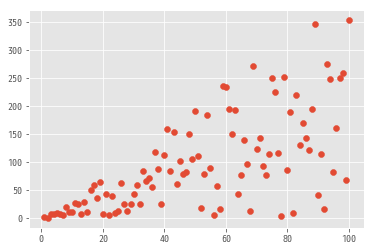

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# 入力値の生成
np.random.seed(2)
x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)

# 散布図の描画
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x, y)

plt.show()

In [2]:
import os
import pandas as pd

df = pd.read_csv('../sample_data/anime_master.csv', index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


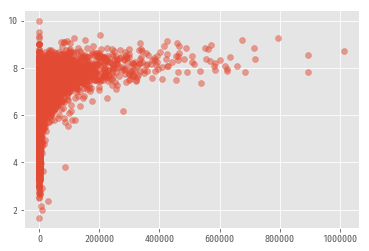

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['members'], df['rating'], alpha=0.5)
plt.show()


In [4]:
# membersの値でデータを絞り込み
df.loc[ df['members'] >= 800000, ['name', 'members']]


,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [5]:
# membersとraitingの値でデータを絞り込み
df.loc[ (df['members'] >= 600000) & (df['rating'] >= 8.5) ,['name','members', 'rating']]

,name,members,rating
anime_id,,,
5114,Fullmetal Alchemist: Brotherhood,793665,9.26
9253,Steins;Gate,673572,9.17
1575,Code Geass: Hangyaku no Lelouch,715151,8.83
1535,Death Note,1013917,8.71
16498,Shingeki no Kyojin,896229,8.54


In [6]:
# typeで実際に使われている値を抽出
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

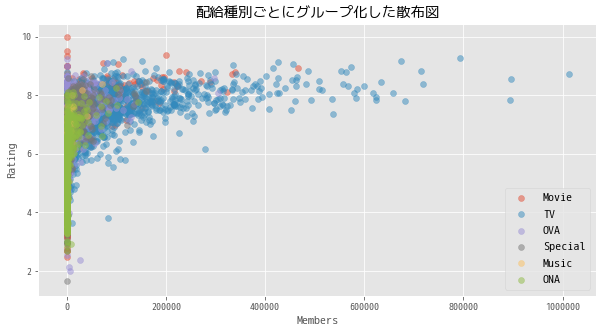

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

for t in types:
    df_select_by_type = df.loc[ df['type'] == t, :]
    x = df_select_by_type['members']
    y = df_select_by_type[ 'rating']
    ax.scatter(x, y, alpha=0.5, label=t)
    
ax.set_title('配給種別ごとにグループ化した散布図')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc ='lower right', fontsize=12)

plt.show()